<a href="https://colab.research.google.com/github/LuckyHorseshoe-chan/DeloneTriangulation/blob/main/delone_triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Для множества P точек плоскости, заданных своими координатами в форме P = {{x1 , y1}, …, {x7 , y7}}, построить триангуляцию, заданную списком смежности S вида {{1, {3, 5, 2}}, …}, то есть вершина номер один смежна с вершинами номер три, пять и два, и так далее. <br/>
1)	Проверить, является ли данная триангуляция триангуляцией Делоне. <br/>
2)	Если нет, то c помощью флипов перестроить полученную триангуляцию в триангуляцию Делоне. Доказать, что полученная в итоге триангуляция — действительно триангуляция Делоне.<br/>

P = {{0, 0}, {-4, 6}, {7, 0}, {0, 7}, {-1, -4}, {5, 6}, {3, 2}} <br/>
S = {{1, {2, 5, 3, 7}}, {2, {5, 1, 4, 7}}, {3, {6, 7, 1, 5}}, {4, {2, 7, 6}}, {5, {3, 1, 2}}, {6, {4, 7, 3}}, {7, {4, 1, 3, 6, 2}}} <br/>


Импортируем необходимые модули: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math, random

Напишем несколько вспомогательных функций. Формулы взяты отсюда:
http://koi.tspu.ru/koi_books/dolganova/1.4.4.html

In [ ]:
def TriangulationP(p, s, c='black'):
  for tie in s:
    for el in tie[1]:
      x = [p[tie[0] - 1][0], p[el - 1][0]]
      y = [p[tie[0] - 1][1], p[el - 1][1]]
      plt.plot(x,y, color = c, marker = 'o')
      plt.plot(x, y, color=c)
def EvalParams(p1, p2, p3):
  a = np.linalg.det(np.array([[p1[0], p1[1], 1], 
                              [p2[0], p2[1], 1], 
                              [p3[0], p3[1], 1]]))
  b = np.linalg.det(np.array([[p1[0]*p1[0] + p1[1]*p1[1], p1[1], 1], 
                              [p2[0]*p2[0] + p2[1]*p2[1], p2[1], 1], 
                              [p3[0]*p3[0] + p3[1]*p3[1], p3[1], 1]]))
  c = np.linalg.det(np.array([[p1[0]*p1[0] + p1[1]*p1[1], p1[0], 1], 
                              [p2[0]*p2[0] + p2[1]*p2[1], p2[0], 1], 
                              [p3[0]*p3[0] + p3[1]*p3[1], p3[0], 1]]))
  d = np.linalg.det(np.array([[p1[0]*p1[0] + p1[1]*p1[1], p1[0], p1[1]], 
                              [p2[0]*p2[0] + p2[1]*p2[1], p2[0], p2[1]], 
                              [p3[0]*p3[0] + p3[1]*p3[1], p3[0], p3[1]]]))
  return a, b, c, d
def EvalCircle(a, b, c, d, p):
  x = b / (2*a)
  y = -c/(2*a)
  r = math.sqrt((p[0] - x)**2 + (p[1] - y)**2)
  return x, y, r
def DrawGraph(a, b, c, d, p):
  x, y, r = EvalCircle(a, b, c, d, p)
  print("x: {0} y: {1} r: {2}".format(x, y, r))
  plt.plot(x,y, color = 'red', marker = 'o')
  angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
  xs = x + r * np.cos(angles)
  ys = y + r * np.sin(angles)
  plt.plot(xs, ys, color = 'grey')

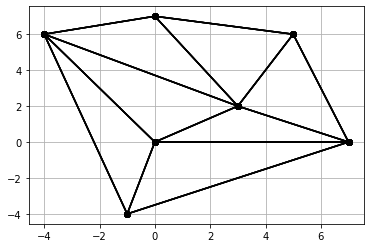

In [ ]:
P = [[0, 0], [-4, 6], [7, 0], [0, 7], [-1, -4], [5, 6], [3, 2]]
S = [[1, [2, 5, 3, 7]], [2, [5, 1, 4, 7]], [3, [6, 7, 1, 5]], [4, [2, 7, 6]], [5, [3, 1, 2]], [6, [4, 7, 3]], [7, [4, 1, 3, 6, 2]]]
TriangulationP(P, S)
plt.grid()
plt.show()

1) Проверим, является ли она триангуляцией Делоне. Для этого проверим каждый четырёхугольник, если он не удовлетворяет условию Делоне, то рисуем на графике описанную вокруг треугольника окружность. <br/>

x: -0.5000000000000002 y: 4.000000000000001 r: 4.0311288741492755
false
x: -1.1086956521739124 y: 2.9347826086956528 r: 4.213691788409857
false


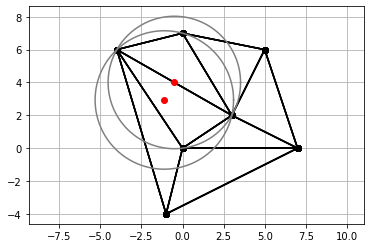

In [ ]:
eps = 0.01

def checkDelone(p0, p1, p2, p3):
  a, b, c, d = EvalParams(p1, p2, p3)
  x, y, r1 = EvalCircle(a, b, c, d, p0)
  x, y, r2 = EvalCircle(a, b, c, d, p1)
  if r2 - r1 > eps:
    DrawGraph(a, b, c, d, p1)
    return False
  return True
TriangulationP(P, S)
for tie in S:
  for i in range(len(tie[1])):
    if tie[1][i] < tie[0]:
      continue  
    for j in range(i + 1, len(tie[1])):
      if tie[1][j] in S[tie[1][i] - 1][1] and tie[1][j] > tie[0]:
        for k in range(len(P)):
          if k == tie[1][j] - 1 or k == tie[0] - 1 or k == tie[1][i] - 1:
            continue
          if checkDelone((P[k][0], P[k][1]), (P[tie[1][j] - 1][0], P[tie[1][j] - 1][1]), (P[tie[0] - 1][0], P[tie[0] - 1][1]), (P[tie[1][i] - 1][0], P[tie[1][i] - 1][1])) == False:
            print("false")

plt.axis('equal')
plt.grid()
plt.show()   

2) C помощью флипов перестроим заданную триангуляцию в триангуляцию Делоне. Делоне не удовлетворяет четырёхугольник [-4, 6], [0, 7], [3, 2] и [0, 0]. Сделаем флип, изменив список смежности, и построим получившуюся триангуляцию

x: -7.045454545454546 y: -0.36363636363636376 r: 7.054832468388232
x: -1.2499999999999993 y: 3.5000000000000018 r: 3.7165171868296243
x: 3.499999999999999 y: -3.0 r: 4.609772228646444
x: 3.4999999999999996 y: -2.0000000000000013 r: 4.031128874149276
x: -0.1666666666666671 y: 3.499999999999999 r: 3.5039660069381076
x: 6.000000000000003 y: 3.000000000000001 r: 3.162277660168382
x: 2.1818181818181817 y: 4.909090909090907 r: 3.021958207017212


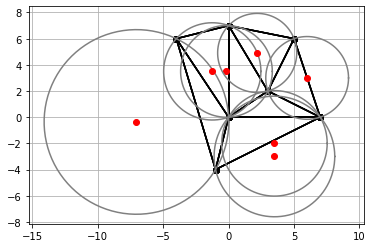

In [ ]:
Sn = [[1, [2, 5, 3, 7, 4]], [2, [5, 1, 4]], [3, [6, 7, 1, 5]], [4, [1, 2, 7, 6]], [5, [3, 1, 2]], [6, [4, 7, 3]], [7, [4, 1, 3, 6]]]
TriangulationP(P, Sn)
for tie in Sn:
  for i in range(len(tie[1])):
    if tie[1][i] < tie[0]:
      continue
    for j in range(i + 1, len(tie[1])):
      if tie[1][j] in Sn[tie[1][i] - 1][1] and tie[1][j] > tie[0]:
        a, b, c, d = EvalParams(P[tie[1][j] - 1], P[tie[0] - 1], P[tie[1][i] - 1])
        x, y, r = EvalCircle(a, b, c, d, P[tie[1][j] - 1])
        DrawGraph(a, b, c, d, P[tie[1][j] - 1])
plt.axis('equal')
plt.grid()
plt.show()